Populating the interactive namespace from numpy and matplotlib


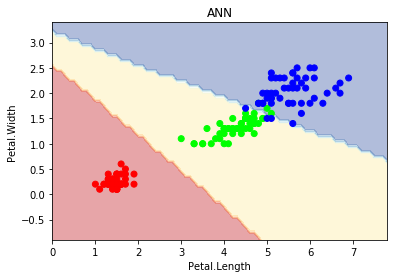

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  4, 46]], dtype=int64)

In [2]:
import numpy as np

def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

def sigmoid_function(x):
    return 1/ (1 + np.exp(-x))

#計算偏微分通用公式
def dfunc(f, x):
    h = 1e-4 
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'])
    while not it.finished:     
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        it.iternext()   
    return grad

# 交叉熵
def cross_entropy_err(y_hat, y):
    delta = 1e-8
    return -np.sum(y*np.log(y_hat + delta))

class ANN:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid_function(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax_function(a2)
        return y
        
    def loss(self, x, y):
        y_hat = self.predict(x)
        return cross_entropy_err(y_hat, y)
        
    def numerical_gradient(self, x, y):
        loss_W = lambda W: self.loss(x, y)
        grads = {}
        grads['W1'] = dfunc(loss_W, self.params['W1'])
        grads['b1'] = dfunc(loss_W, self.params['b1'])
        grads['W2'] = dfunc(loss_W, self.params['W2'])
        grads['b2'] = dfunc(loss_W, self.params['b2'])
        return grads

from sklearn.datasets import load_iris
iris = load_iris()

iris.data.shape

net = ANN(input_size=2, hidden_size=5, output_size=3)
x = iris.data[:, [2, 3]]
iris.target

#array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
#       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
#       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
#       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
#       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

[0,1,0], [0,0,1]
y = np.zeros((len(iris.target), 3))
for idx, val in enumerate(iris.target):
    y[idx, val] = 1


epochs = 3000   #3000次 迭代
lr     = 0.01   #學習率

train_loss = []
for i in range(epochs):      #3000次 迭代   
    grad = net.numerical_gradient(x,y)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] = net.params[key] - lr * grad[key]   #權重 -(學習率*梯度)
    loss = net.loss(x, y)
    train_loss.append(loss)

#先設定繪圖的範圍
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
#繪製網格的格子
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

# 將結果3476筆資料 改變陣列形狀
np.c_[xx.ravel(),yy.ravel()]  
#將xx(1,2,3,4)陣列與 yy(5,6,7,8)陣列 合成 (x,y)  (1,5),(2,6),(3,7),(4,8)
# xx.ravel(),yy.ravel() 將 xx, yy陣列拉平 帶入做預測
Z=net.predict(np.c_[xx.ravel(),yy.ravel()]) 
#Z.shape(3476, 3)
Z=np.argmax(Z, axis =1)
#將Z的陣列調整成跟 xx一樣
Z=Z.reshape(xx.shape)
#Z.shape(44, 79)

# 進行繪圖
% pylab inline
import numpy as np
from matplotlib import pyplot as plt

plt.plot()
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap = plt.cm.brg)
plt.title('ANN')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()

#Populating the interactive namespace from numpy and matplotlib

from sklearn.metrics import accuracy_score, confusion_matrix
predicted = np.argmax(net.predict(x), axis=1)

accuracy_score(iris.target, predicted)
0.9666666666666667

confusion_matrix(iris.target, predicted)
array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  4, 46]], dtype=int64)